In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import linalg

from semester6 import eigenproblem
from semester6.utils import print_matrix

pd.options.display.float_format = '{:,.16f}'.format
np.set_printoptions(precision=16, suppress=True)


def answer(a: np.array, eps: float = 10e-6, to_print: bool = True) -> None:
    if to_print:
        print("Исходная матрица:", end="")
        print_matrix(a)

    print("Точность:", eps)
    print("Циклический выбор")
    (eigenvalues1, count1) = eigenproblem.solve_full(a, eigenproblem.FullEigenproblemMethod.Cyclic, eps)
    print("Собственные числа:", eigenvalues1)
    print("Количество итераций:", count1)

    print("Оптимальный выбор")
    (eigenvalues2, count2) = eigenproblem.solve_full(a, eigenproblem.FullEigenproblemMethod.Optimal, eps)
    print("Собственные числа:", eigenvalues2)
    print("Количество итераций:", count2)

    print("|e_1 - e_2| (сортированный):", np.abs(np.sort(eigenvalues1) - np.sort(eigenvalues2)))

    rs = eigenproblem.get_r_is(a)
    centers = np.diag(a)
    radii = list(map(lambda x: (x[0] - abs(x[1]), x[0] + abs(x[1])), zip(centers, rs)))
    def _check_in_circle(e: float) -> bool:
        for (start, end) in radii:
            if start <= e <= end:
                return True
        return False
    ans = map(_check_in_circle, eigenvalues2)
    print("Все числа попадают в круги Гершгорина:", all(list(ans)))

In [2]:
a1 = np.array([[1, 2, -1, 5], [2, 1, 3, 0], [-1, 3, 0, 4], [5, 0, 4, 2]])
answer(a1)

Исходная матрица:         
 1 2 -1 5
 2 1  3 0
-1 3  0 4
 5 0  4 2
Точность: 1e-05
Циклический выбор
Собственные числа: [-6.751823610575187   0.4119816263834866  2.272768688353733
  8.067073295837968 ]
Количество итераций: 21
Оптимальный выбор
Собственные числа: [-6.751823610576471   0.4119816263886125  2.272768688349876
  8.067073295837982 ]
Количество итераций: 17
|e_1 - e_2| (сортированный): [0.0000000000012843 0.000000000005126  0.0000000000038569
 0.0000000000000142]
Все числа попадают в круги Гершгорина: True


In [3]:
from scipy import io

a2 = io.mmread("lap_25/lap_25.mtx").toarray()
answer(a2, to_print=False)

Точность: 1e-05
Циклический выбор
Собственные числа: [-2.                  7.464101615137733   5.46410161513775
 -0.0000000000000005  2.732050807568875  -1.4641016151377502
 -1.4641016151377508 -0.7320508075669319 -1.9999999999999962
  0.0000000000283271  5.4641016151376505 -0.7320508075686256
  0.0000000000008197  3.999999999999867   1.999999999970129
 -0.0000000000006167  2.7320508075688745  1.9999999999999982
 -0.0000000000005319 -0.0000000000001004  0.9999999999999994
 -0.0000000000000001 -0.0000000000000018  0.5358983848622443
 -0.0000000000000002]
Количество итераций: 1976
Оптимальный выбор
Собственные числа: [ 5.464101615135079  -0.000000000000064   5.464101615132564
  0.0000000000031696  0.0000000000015226  0.0000000000002422
 -1.464101615135969  -1.999999999998627  -0.0000000000158234
 -0.000000000000907   3.9999999999977995  1.9999999999989413
 -0.7320508075466433  7.464101615136965   0.5358983848565116
 -0.0000000000013274 -1.4641016151328523 -0.0000000000032985
 -1.99999999

In [4]:
a3 = linalg.hilbert(50)
answer(a3, eps=10e-12, to_print=False)

Точность: 1e-11
Циклический выбор
Собственные числа: [ 2.076296683131145   0.6796937529593887  0.0043026572692841
  0.1496843089431742  0.0000000101902243  0.0270926593779868
  0.0000000000000106  0.0006142472030699  0.0000000009030321
  0.0000000000002357  0.0000000000000001  0.0000798437641141
  0.0000000000021927  0.                  0.
  0.0000000000000025  0.0000000000000001  0.0000095276953646
  0.                 -0.                 -0.
  0.                 -0.                 -0.
  0.                  0.0000000000000004  0.0000010497216233
  0.0000000000000002  0.0000000000000001  0.0000001072354565
  0.0000000000000001  0.                  0.0000000000747436
  0.0000000000000064 -0.                  0.0000000000000002
  0.                 -0.                  0.
  0.0000000000000012  0.                 -0.
  0.0000000000038273 -0.                  0.
  0.                  0.                  0.
 -0.                  0.                ]
Количество итераций: 7970
Оптимальный выб

In [5]:
iter_count = 100

x = np.linspace(10e-6, 10e-12, num=iter_count, endpoint=False)

cyclic_method_count = []
optimal_method_count = []

for i in range(iter_count):
    (_, count1) = eigenproblem.solve_full(a2, eigenproblem.FullEigenproblemMethod.Cyclic, eps=x[i])
    (_, count2) = eigenproblem.solve_full(a2, eigenproblem.FullEigenproblemMethod.Optimal, eps=x[i])
    cyclic_method_count.append(count1)
    optimal_method_count.append(count2)

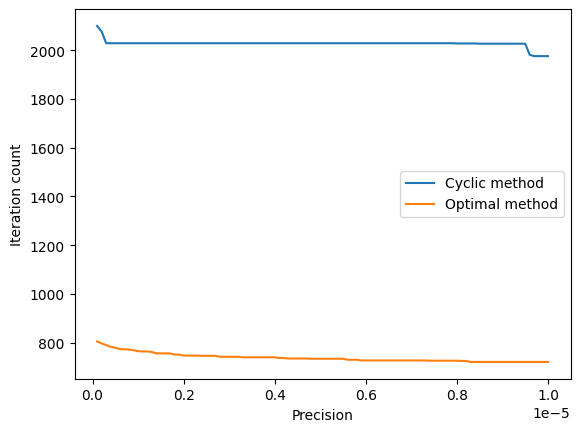

In [6]:
cyclic_method, = plt.plot(x, cyclic_method_count, label="Cyclic method")
optimal_method, = plt.plot(x, optimal_method_count, label="Optimal method")
plt.legend(handles=[cyclic_method, optimal_method], loc="best")
plt.xlabel("Precision")
plt.ylabel("Iteration count")
# plt.yscale('log')
plt.show()

In [7]:
a4 = io.mmread("bcsstk01/bcsstk01.mtx").toarray()
answer(a4, to_print=False)

Точность: 1e-05
Циклический выбор
Собственные числа: [8.9700098180510940e+03 6.6379064477950160e+05 1.0835655483562334e+04
 1.0257324752520261e+09 1.3451623766088591e+09 7.6747163587767792e+08
 3.4172675626666046e+03 6.5563938344778668e+05 3.3815109464378161e+06
 5.7963866181794393e+08 5.8359241407939231e+08 8.9564636555574930e+08
 5.6180361351643112e+06 6.6051717525003408e+05 7.5100150136593925e+06
 1.8530564774119346e+09 1.8586819015798450e+09 3.0151790898976722e+09
 5.6229085876786150e+06 6.0311780766636075e+05 2.2326991414996985e+04
 8.5629494079317164e+08 1.0071459543481838e+09 2.2079571400935335e+09
 7.1063816065971652e+04 4.3084115635426138e+06 7.0090059084878812e+04
 2.0183727947166708e+09 4.1201820764954060e+08 4.7698258771367800e+08
 7.5839420424796306e+04 4.3178014018717399e+06 4.7615938022182584e+06
 1.3870769246581790e+09 1.7850947533834648e+09 2.2205934073426352e+09
 7.9025708919978840e+06 4.3104060109045189e+06 1.3424602895295122e+06
 1.2759493182780905e+09 1.11789149151